# Prject(Group 6) Prediction of Movies' Performance based on IMDb data

## ——Visualization and Exploratory data analysis

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Checking the dataframe and choosing features
First, we import the cleaned dataset. The whole dataset has 12 features as well as over 400,000 movie data.

In [2]:
imdb = pd.read_csv('imdb.csv')
imdb

,Unnamed: 0,tconst,nconst,category,averageRating,numVotes,primaryTitle,isAdult,startYear,runtimeMinutes,genres,primaryName
0,92759,tt0013274,nm0412842,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,Nikolai Izvolov
1,92760,tt0013274,nm0895048,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,Dziga Vertov
2,522892,tt0062336,nm0815612,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Rubén Sotoconil
3,522893,tt0062336,nm1860495,actress,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Claudia Paz
4,522894,tt0062336,nm0016013,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Luis Alarcón
...,...,...,...,...,...,...,...,...,...,...,...,...
404310,54610727,tt9916730,nm6096005,actor,8.3,10,6 Gunn,0,2017,116,\N,Devadhar Archit
404311,54610728,tt9916730,nm0059461,actor,8.3,10,6 Gunn,0,2017,116,\N,Sunil Barve
404312,54610729,tt9916730,nm13233318,actor,8.3,10,6 Gunn,0,2017,116,\N,Ganesh Vasant Patil
404313,54610730,tt9916730,nm4852679,actor,8.3,10,6 Gunn,0,2017,116,\N,Bhushan Pradhan


In our program, ratings are the most important indicator of a film's popularity. So we can start by looking at the specific data of the ratings.

In [3]:
imdb.averageRating.describe()

count    404315.000000
mean          6.057180
std           1.522904
min           1.000000
25%           5.100000
50%           6.200000
75%           7.100000
max          10.000000
Name: averageRating, dtype: float64

In our data set, we can see that the average rating is around 6.0 and the median is 6.2. And most scores are between 5.1 and 7.1. This will affect our next specific rating of the movie's popularity. For now, we will make the following scale of popularity: 
- Very Positive(>7.1)
- Mostly Positive(6.0-7.1)
- Mostly nagative(5.1-6.0)
- Very Nagative(<5.1)

Then, let's explore which factors are strongly correlated with the scores, which will greatly help our machine learning model to make predictions:

In [4]:
# Check how many factors our data set have
imdb.columns.values.tolist()

['Unnamed: 0',
 'tconst',
 'nconst',
 'category',
 'averageRating',
 'numVotes',
 'primaryTitle',
 'isAdult',
 'startYear',
 'runtimeMinutes',
 'genres',
 'primaryName']

It can be clearly observed that the first 3 factors are only the number of the movie or the actor/director. So we can exclude these 3 between them.It can be clearly observed that the first 3 factors are only the number of the movie or the actor/director. So we can exclude these 3 between. And averageRating, numVotes, isAdult, startYear and runtimeMinutes are very good quantifiable data. genres would also be one of the factors that could have a significant impact. So we will analyze these factors next.

First is the distribution of average rating

Text(0.5, 1.0, 'The distribution of  average rating')

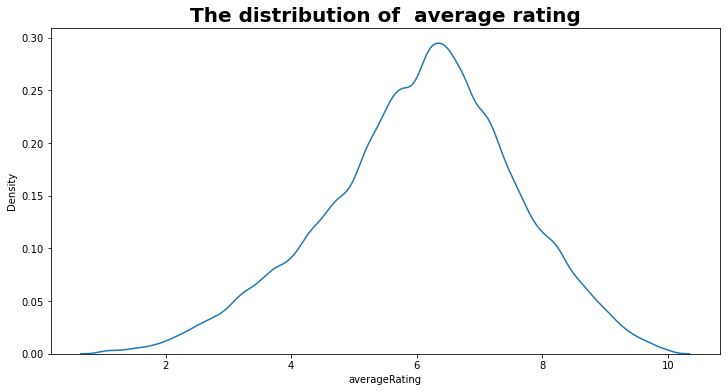

In [5]:
#评分的分布情况
plt.figure(figsize=(12, 6))
sns.kdeplot(imdb['averageRating'])
plt.title('The distribution of  average rating', fontsize=20, weight='bold', color='black')

## The relationship of ratings and other element


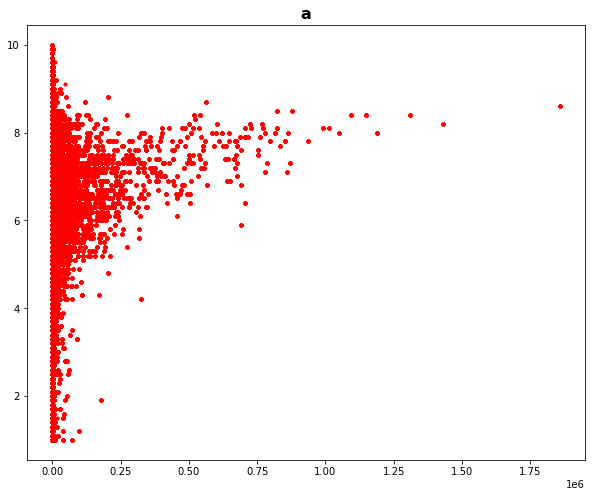

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(imdb['numVotes'], imdb['averageRating'], s=10, c='red')
plt.title('a', fontsize=16, weight='bold')
plt.show()

Regarding the relationship between the number of votes and the ratings, the scatterplot presents an uncorrelated feature. However, we can observe that a large number of votes occurs around a rating of 8.0. This means that good movies are more likely to receive a large number of ratings. But the number of votes is statistically uncorrelated for ratings.

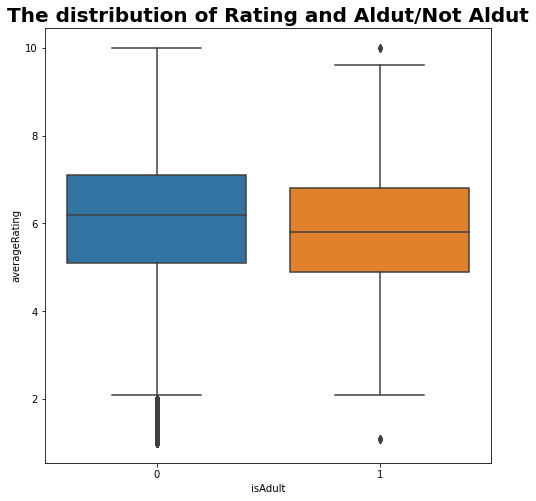

In [7]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="isAdult", y="averageRating", data=imdb, linewidth=1.5)
plt.title('The distribution of Rating and Aldut/Not Aldut',fontsize=20, weight='bold')
plt.show()

boxplot shows that whether a movie is adult-rated or not makes big difference in terms of rating. But not adult movie got higher mean value, so when we doing the machine learning model, this factor would be considered

<AxesSubplot:title={'center':'The distribution of film release year'}>

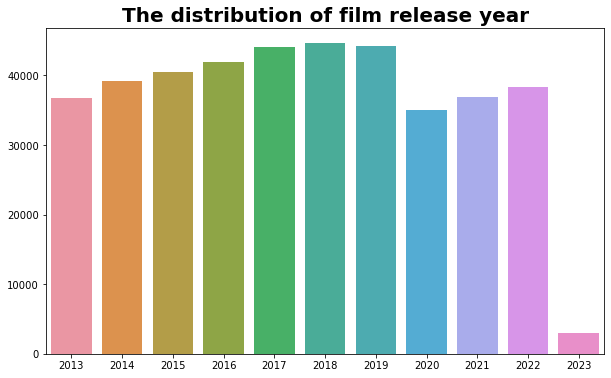

In [8]:
df = imdb.startYear.value_counts()
x = [i for i in df.keys()]
y = []
for i in range(0,11):
    y.append(df.values[i])
plt.figure(figsize=(10, 6))
plt.title('The distribution of film release year', fontsize=20, weight='bold')
sns.barplot(x=x, y=y)

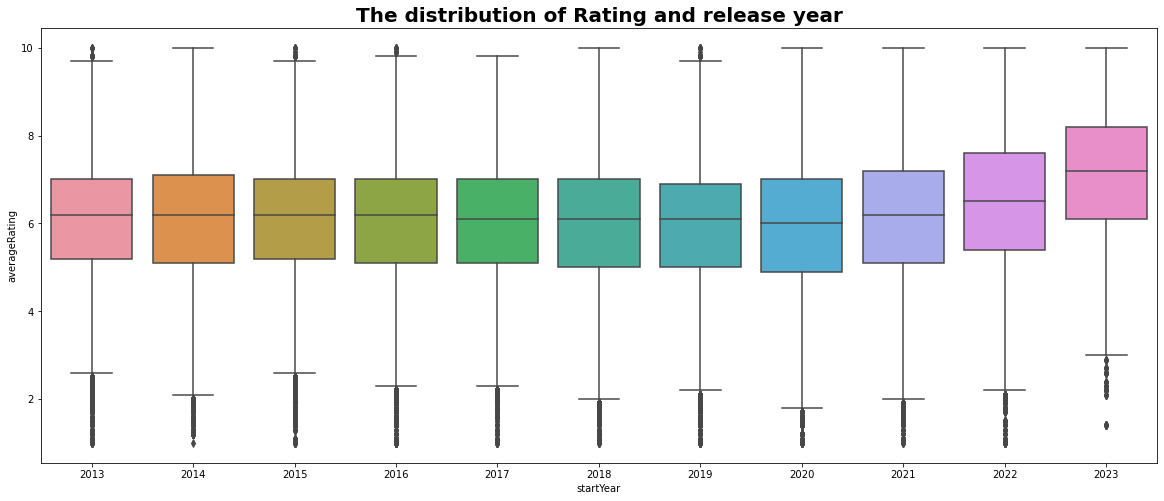

In [9]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="startYear", y="averageRating", data=imdb, linewidth=1.5)
plt.title('The distribution of Rating and release year',fontsize=20, weight='bold')
plt.show()

We can see that people generally have better ratings for new movies released after 2021. Despite the huge impact of the pandemic on the movie industry in 2020 resulting in a drop in the number of releases, we still have 35,000 data per year(except 2023), so it is still a valid conclusion that the newer the movie, the more likely it is to receive a high rating.

In [10]:
df1 = imdb
df1 = df1.drop(['genres'], axis=1).join(df1['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df1

,Unnamed: 0,tconst,nconst,category,averageRating,numVotes,primaryTitle,isAdult,startYear,runtimeMinutes,primaryName,genres
0,92759,tt0013274,nm0412842,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Nikolai Izvolov,Documentary
1,92760,tt0013274,nm0895048,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Dziga Vertov,Documentary
2,522892,tt0062336,nm0815612,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Rubén Sotoconil,Drama
3,522893,tt0062336,nm1860495,actress,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Claudia Paz,Drama
4,522894,tt0062336,nm0016013,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Luis Alarcón,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
404310,54610727,tt9916730,nm6096005,actor,8.3,10,6 Gunn,0,2017,116,Devadhar Archit,\N
404311,54610728,tt9916730,nm0059461,actor,8.3,10,6 Gunn,0,2017,116,Sunil Barve,\N
404312,54610729,tt9916730,nm13233318,actor,8.3,10,6 Gunn,0,2017,116,Ganesh Vasant Patil,\N
404313,54610730,tt9916730,nm4852679,actor,8.3,10,6 Gunn,0,2017,116,Bhushan Pradhan,\N


<AxesSubplot:title={'center':'The distribution of genres'}>

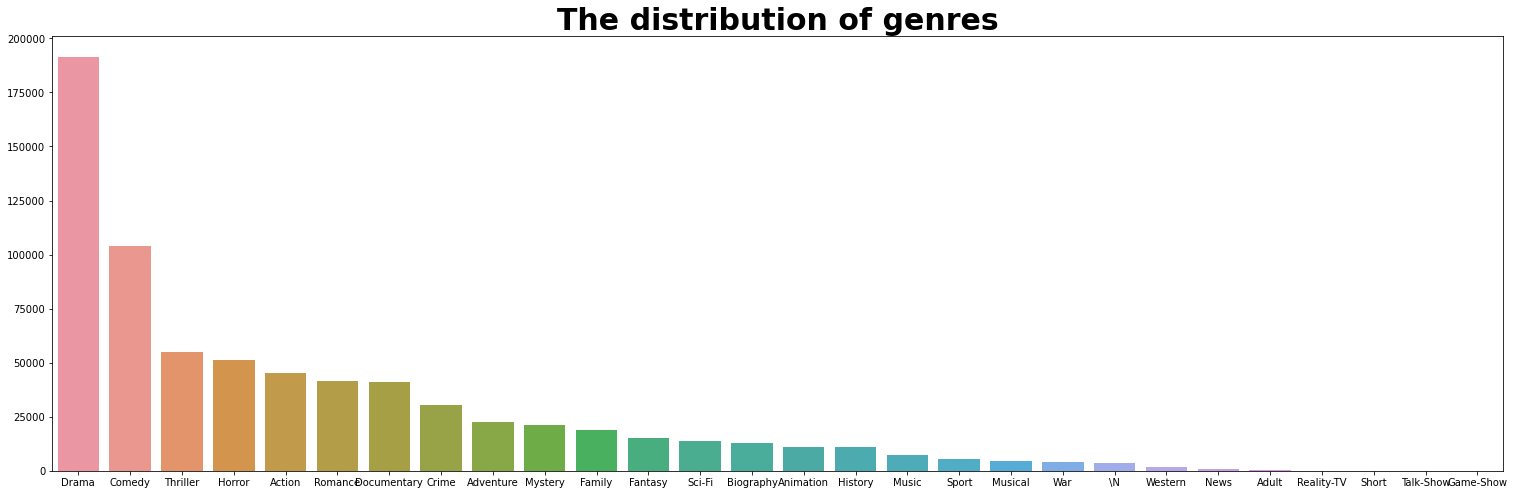

In [11]:
df2 = df1.genres.value_counts()
x = [i for i in df2.keys()]
y = []
for i in range(0,28):
    y.append(df2.values[i])
plt.figure(figsize=(26, 8))
plt.title('The distribution of genres', fontsize=30, weight='bold')
sns.barplot(x=x, y=y)

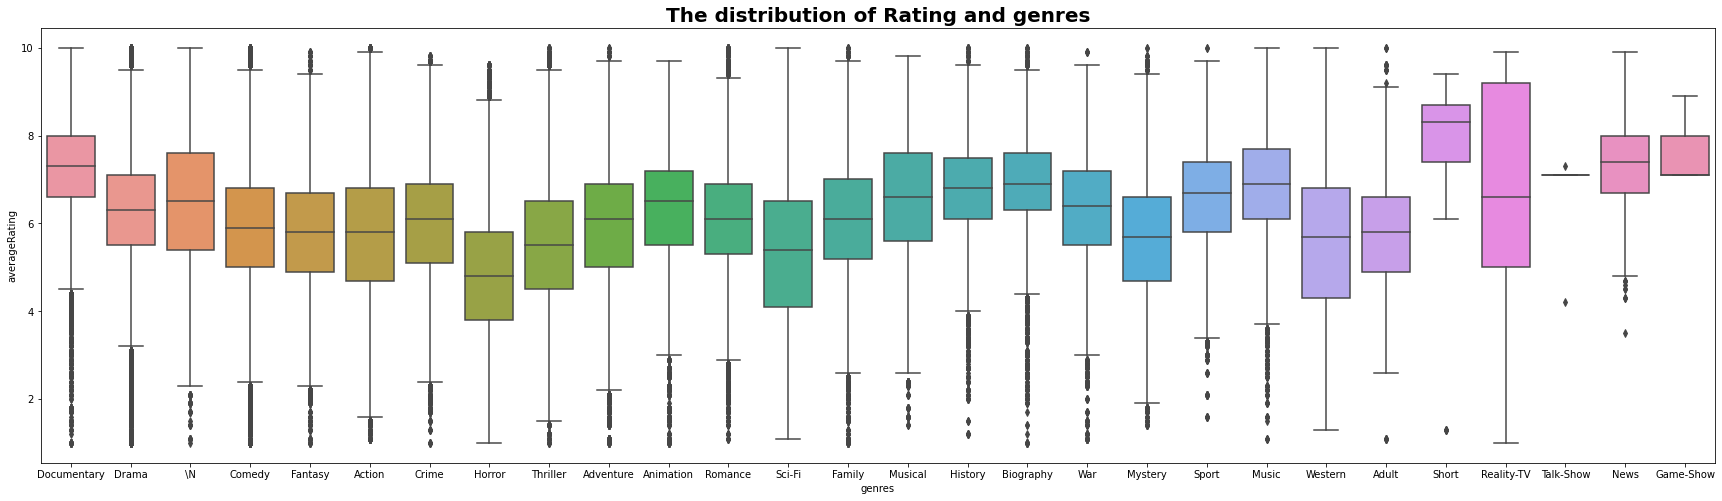

In [12]:
plt.figure(figsize=(30, 8))
sns.boxplot(x="genres", y="averageRating", data=df1, linewidth=1.5)
plt.title('The distribution of Rating and genres',fontsize=20, weight='bold')
plt.show()

Here, we can see that Horror, Sci-Fi, Mystery and Western movies are less likely to get high ratings. While Documentary, Drama, Crime, Animation, Musical, History, Biography titles are most likely to get high ratings (except for some genres with too small a sample size).

## Summary and future work

Based on the above analysis, we will make movie rating predictions mainly for genres and release years. In the next work, we will use multiple linear regression models, decision tree regression models, random forest regression models, etc. to predict movie ratings.

In [13]:
drop_columns = ["Unnamed: 0", "tconst", "nconst", "category", "primaryTitle", "primaryName"]
df_model = df1.drop(drop_columns, axis=1)
df_model

,averageRating,numVotes,isAdult,startYear,runtimeMinutes,genres
0,6.7,48,0,2021,133,Documentary
1,6.7,48,0,2021,133,Documentary
2,6.4,164,0,2020,70,Drama
3,6.4,164,0,2020,70,Drama
4,6.4,164,0,2020,70,Drama
...,...,...,...,...,...,...
404310,8.3,10,0,2017,116,\N
404311,8.3,10,0,2017,116,\N
404312,8.3,10,0,2017,116,\N
404313,8.3,10,0,2017,116,\N


In [14]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715617 entries, 0 to 404314
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   averageRating   715617 non-null  float64
 1   numVotes        715617 non-null  int64  
 2   isAdult         715617 non-null  int64  
 3   startYear       715617 non-null  int64  
 4   runtimeMinutes  715617 non-null  object 
 5   genres          715617 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 54.3+ MB


In [15]:
df_model['genres'] = df_model['genres'].replace({r'\N': None})
df_model['runtimeMinutes'] = df_model['runtimeMinutes'].replace({r'\N': None}).astype(float)

In [16]:
df_model

,averageRating,numVotes,isAdult,startYear,runtimeMinutes,genres
0,6.7,48,0,2021,133.0,Documentary
1,6.7,48,0,2021,133.0,Documentary
2,6.4,164,0,2020,70.0,Drama
3,6.4,164,0,2020,70.0,Drama
4,6.4,164,0,2020,70.0,Drama
...,...,...,...,...,...,...
404310,8.3,10,0,2017,116.0,None
404311,8.3,10,0,2017,116.0,None
404312,8.3,10,0,2017,116.0,None
404313,8.3,10,0,2017,116.0,None


In [17]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715617 entries, 0 to 404314
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   averageRating   715617 non-null  float64
 1   numVotes        715617 non-null  int64  
 2   isAdult         715617 non-null  int64  
 3   startYear       715617 non-null  int64  
 4   runtimeMinutes  666033 non-null  float64
 5   genres          711877 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 54.3+ MB


In [18]:
df_model = df_model.dropna()

In [19]:
df_model = df_model.reset_index(drop=True)

In [20]:
from sklearn.preprocessing import LabelEncoder

# creating instances of labelencoder
labelencoder = LabelEncoder()

# Assigning numeric values and convert the non-numeric column
df_model['genres'] = labelencoder.fit_transform(df_model['genres'])
df_model.head()

,averageRating,numVotes,isAdult,startYear,runtimeMinutes,genres
0,6.7,48,0,2021,133.0,7
1,6.7,48,0,2021,133.0,7
2,6.4,164,0,2020,70.0,8
3,6.4,164,0,2020,70.0,8
4,6.4,164,0,2020,70.0,8


In [21]:
y = df_model['averageRating']
x = df_model.drop(['averageRating'], axis = 1)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.922841096252555

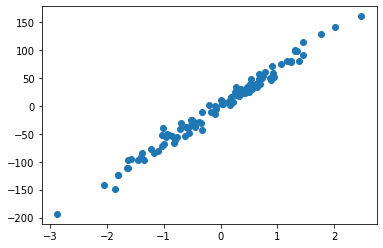

In [24]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict_valid = model.predict(X_test)
X, y =datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=10)
plt.scatter(X, y)
plt.show()

### Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# create a decision tree regressor with max depth of 5
dt_regressor = DecisionTreeRegressor(max_depth=5)

# train the model on the training data
dt_regressor.fit(X_train, y_train)

# make predictions on the test data
y_pred_new = dt_regressor.predict(X_test)

In [26]:
# Compute the R^2 score of the model
score = r2_score(y_test, y_pred_new)
print("R^2 score:", score)

R^2 score: 0.19625119914219136


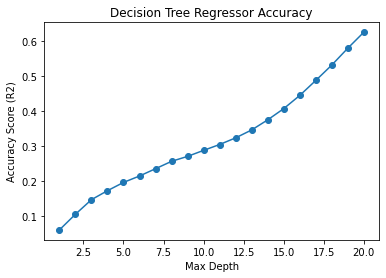

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

depths = range(1, 21)  # try depths from 1 to 20
accuracy_scores = []
for depth in depths:
    # build decision tree regressor with current depth
    clf = DecisionTreeRegressor(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# plot the accuracy graph
plt.plot(depths, accuracy_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score (R2)')
plt.title('Decision Tree Regressor Accuracy')
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)

# Perform 10-fold cross-validation
scores = cross_val_score(regressor, X_train, y_train, cv=10)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.91300968 0.91085041 0.90707557 0.91336029 0.90923466 0.90285387
 0.90494561 0.91097361 0.91026583 0.91353565]
Mean cross-validation score: 0.9096105162931929


In [29]:
# train the model on the training data
regressor.fit(X_train, y_train)

# make predictions on the test data
y_pred_new = dt_regressor.predict(X_test)

In [31]:
# Compute the R^2 score of the model
score = r2_score(y_test, y_pred)
print("R^2 score:", score)

R^2 score: 0.6263616933723876


### PCA

In [32]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train)

In [36]:
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)
score = reg.score(X_test_pca, y_test)
print("Accuracy score:", score)

Accuracy score: 0.017325106775817
